
# Project: Investigation of the TMBD movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.

>● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.

>● There are some odd characters
in the ‘cast’ column.we can leave them as they are without change.

>● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time

>We could ask various questions like :

>●what are the top 10 movies that had the highest revenue_adj ?

>●What is the correleation between revenue_adj and budget_adj ?

>●What are the movie relaeses count across years ?

>● Which genres have the highest movie releases?





In [31]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



### General Properties of the investicated datasets

In [32]:
# Loading data and cheching the first 5 rows for initial investigation
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [33]:
#investigating datatypes and missing columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>Its clear that there is a lot of columns which will be irrelvant to our analaysis like :
id,imdb_id,homepage,tagline,keywords and overview so these columns will be dropped 

In [34]:
#viewing the data statistics 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


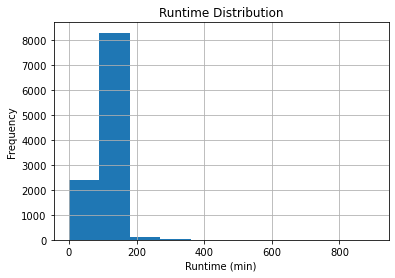

In [35]:
#1-d analysis to understand the distribution of runtime 

fig0=df['runtime'].hist();
fig0.set_xlabel("Runtime (min)");
fig0.set_ylabel("Frequency");
fig0.set_title("Runtime Distribution");

>Runtime is usually les than 200 min .


### Data Cleaning 

In [36]:
#removing irrelevant columns to our analysis
df.drop(['id', 'imdb_id','homepage','tagline', 'keywords', 'overview'],axis=1,inplace=True)
#checking for their removal
df.head(0)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [37]:
# checking for duplicates

df.duplicated().sum()

1

In [38]:
#removing duplicates
df.drop_duplicates(inplace=True)
#checking for dupicates removal
df.duplicated().sum()

0

In [39]:
#we know from info() that there are null objects in genres and production companies aand they are related to our analysis 
display(df['genres'].isnull().sum())
df['production_companies'].isnull().sum()

23

1030

In [40]:
# To avoid loss of useful data for analysis we will make copy one for  no null genres 
df_gen= df.dropna(subset = ['genres'])


#checking the removal process of null values
print(df_gen['genres'].isnull().sum())
print(df.info())
print(df_gen.info())


0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   runtime               10865 non-null  int64  
 7   genres                10842 non-null  object 
 8   production_companies  9835 non-null   object 
 9   release_date          10865 non-null  object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
 13  budget_adj            10865 non-null  float64
 14  revenue_adj           10865 non-null  float64
dtypes: float64(4), in

In [41]:
#making sure no rows have zero value for budget_adj o or revenue_adj or runtime 
df.query("(budget_adj == 0) | (revenue_adj == 0)")


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
36,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
48,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00
67,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
72,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.000000e+00,4.222338e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [42]:
#removing rows with budget_adj and revenue_adj which equal to zero
df_modified = df[(df['budget_adj'] > 0 )&(df['revenue_adj'] > 0)]
df_modified.query("(budget_adj == 0) | (revenue_adj == 0)")


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


> we could see that all the zero values of budget and revunue adj have been removed 

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 :what are the top 10 movies that had the highest revenue_adj ?

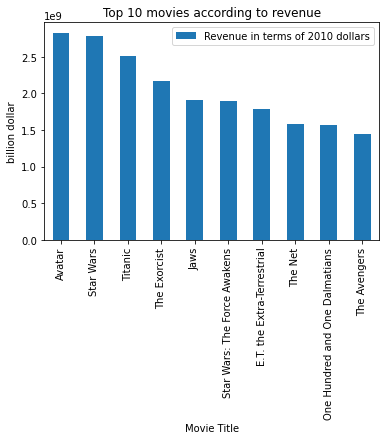

In [43]:
#we will use the orignal dataframe for this question
fig1=df.nlargest(10,'revenue_adj').plot(x='original_title',y='revenue_adj',title="Top 10 movies according to revenue",kind='bar');
fig1.legend(['Revenue in terms of 2010 dollars']);
fig1.set_xlabel("Movie Title");
fig1.set_ylabel("billion dollar");


### Research Question 2 :What is the correleation between revenue_adj and budget_adj ?

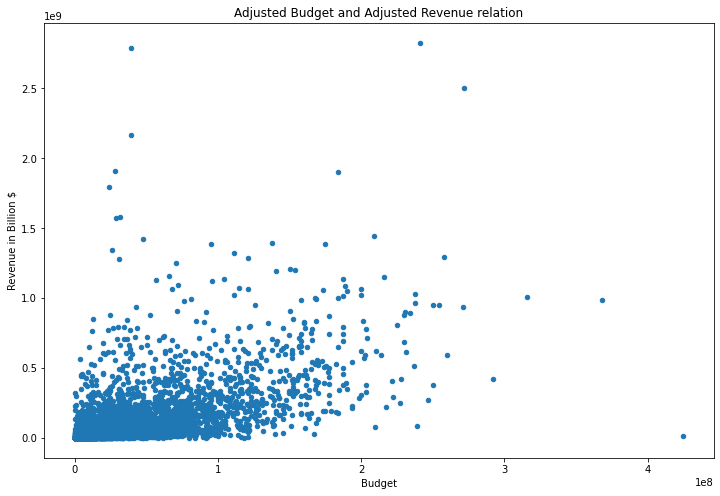

In [44]:
fig2=df_modified.plot(x='budget_adj',y='revenue_adj',kind='scatter',title='Adjusted Budget and Adjusted Revenue relation',figsize=(12,8))
fig2.set_xlabel("Budget");
fig2.set_ylabel("Revenue in Billion $");

>There seems to be a corelattion between reveunue and budget (adjusted) but its not very clear using visual approaches so we will try analytical ones using the .corr method

In [45]:
data_corr = df.corr()
print("Correlation Between Revenue And Budget : ",data_corr.loc['revenue_adj','budget_adj'])

Correlation Between Revenue And Budget :  0.646626612234756


>Indeed there is a positive corelation between reveunue and budget (adjusted)

### Research Question 3 :what are the movie releases count across years ?


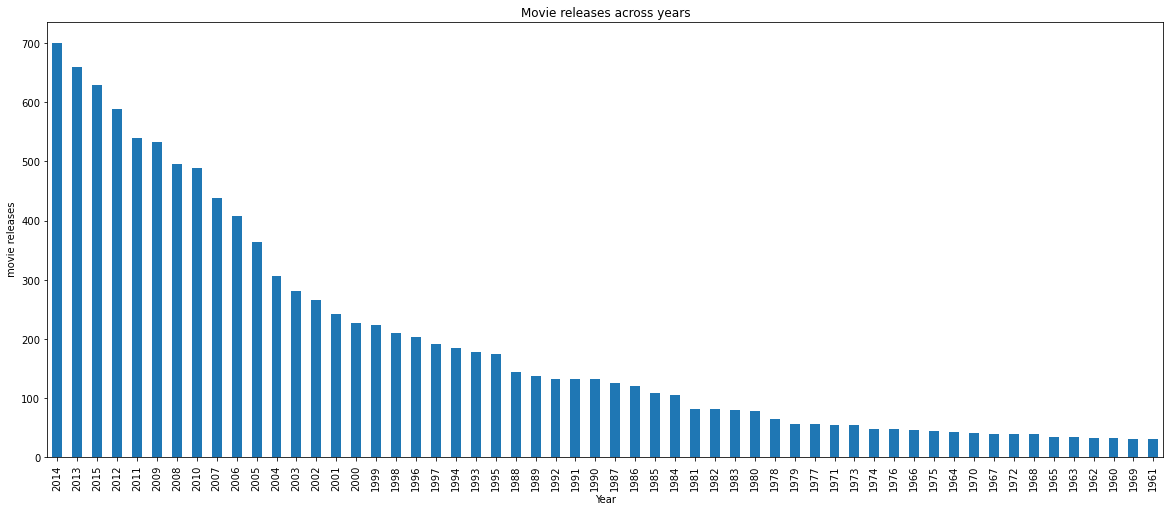

In [46]:
fig3=df.release_year.value_counts().plot(x='release_year',title='Movie releases across years',kind='bar',figsize=(20,8));
fig3.set_xlabel("Year");
fig3.set_ylabel(" movie releases");

>This chart states the fact that 2014 was a great year for the cinema industry ,personally i love many movies that were produced in 2014 specially interstellar .

### Research Question 4 : Which Genre Has The Highest Release Of Movies?¶



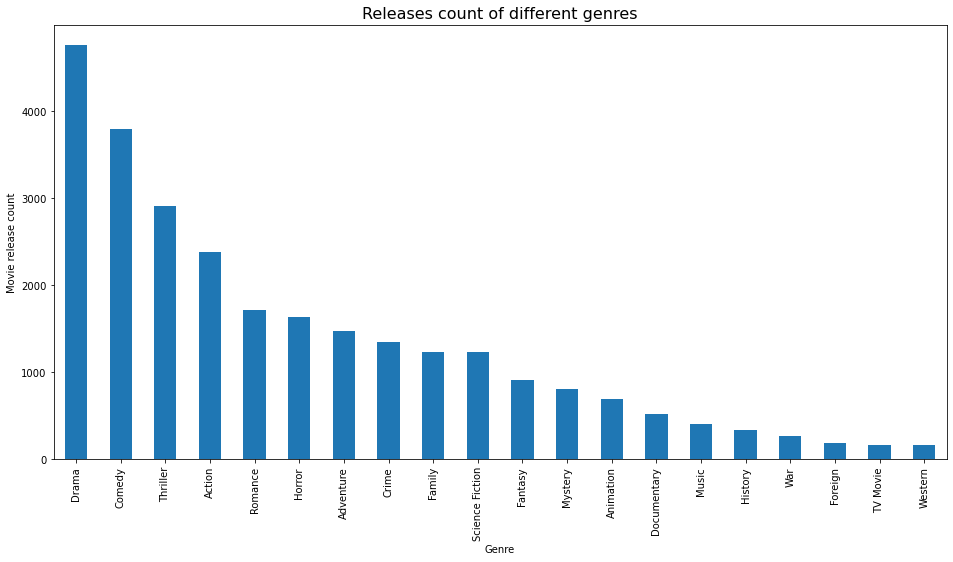

In [47]:
# concatinate all genres given that the separator is the | sign
genres_concat = df_gen['genres'].str.cat(sep = '|')
# make a series of the concatenated genres
data = pd.Series(genres_concat.split('|'))
#count the occurances of each genre using value counts
genres_counts=data.value_counts().plot(figsize=(16,8),kind='bar')
#setting the labels and titles for the figure
genres_counts.set_xlabel("Genre");
genres_counts.set_ylabel("Movie release count");
genres_counts.set_title("Releases count of different genres",fontsize=16);

>It seems that drama has the highest release of movies 

<a id='conclusions'></a>
## Conclusions



### Research Question 1 :what are the top 10 movies that had the highest revenue_adj ?
>The top one is AVATAR and the rest are shown in the chart 
### Research Question 2 :What is the correleation between revenue_adj and budget_adj ?
>Indeed there is a positive corelation between reveunue and budget (adjusted)

### Research Question 3 :what are the movie releases count across years ?
>This chart states the fact that 2014 was a great year for the cinema industry ,personally i love many movies that were produced in 2014 specially interstellar .

### Research Question 4 : Which Genre Has The Highest Release Of Movies?¶
>It seems that drama has the highest release of movies 

### Limitations :
>All results are limited to the underlying data set and as no advaned statistics were performed, the results can only be treated as indicators and are not generalizable. Furthermore, one has to consider that many entries in the dataset have been removed due to missing data